# Multiple Linear Regression

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
df=pd.read_csv("C://Users//korla//Desktop//krish codes//Multiple-Linear-Regression-master//50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


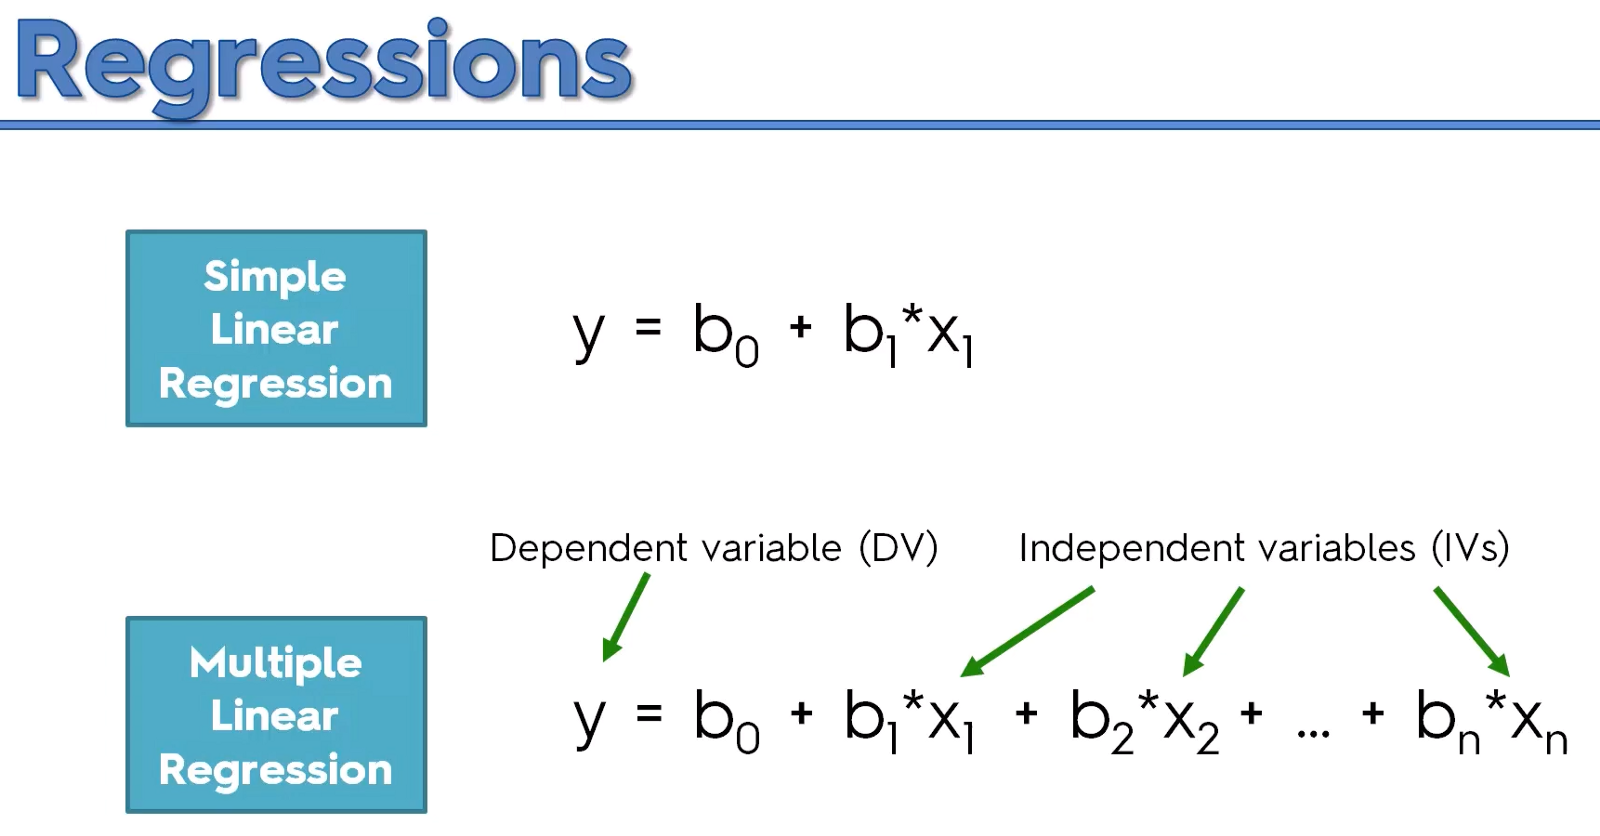

In [83]:
from IPython.display import Image
Image("C:/Users/korla/Desktop/img/M.L 1.PNG")

In [15]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [21]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [24]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [31]:
states = pd.get_dummies(X['State'],drop_first=True)

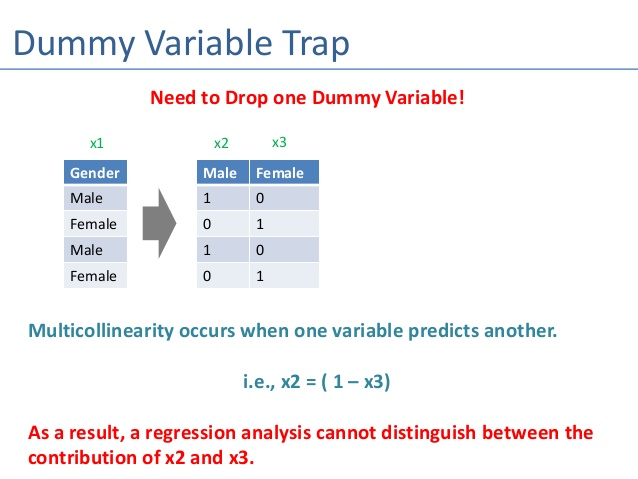

In [87]:
from IPython.display import Image
Image("C:/Users/korla/Desktop/img/M.L 3.JPG",width=800,height=800)

In [32]:
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [33]:
X=X.drop('State',axis=1)

In [35]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [36]:
# concat the dummy variables
X=pd.concat([X,states],axis=1)


In [37]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


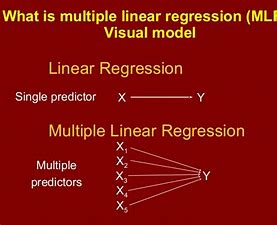

In [90]:
from IPython.display import Image
Image("C:/Users/korla/Desktop/img/M.L 2.JPG",width=600,height=400)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
 

In [39]:
X_train.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
46,1315.46,115816.21,297114.46,1,0
47,0.00,135426.92,0.00,0,0
15,114523.61,122616.84,261776.23,0,1
9,123334.88,108679.17,304981.62,0,0
16,78013.11,121597.55,264346.06,0,0


In [40]:
y_train.head()

46     49490.75
47     42559.73
15    129917.04
9     149759.96
16    126992.93
Name: Profit, dtype: float64

In [41]:
X_test.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
13,91992.39,135495.07,252664.93,0,0
39,38558.51,82982.09,174999.30,0,0
30,61994.48,115641.28,91131.24,1,0
45,1000.23,124153.04,1903.93,0,1
17,94657.16,145077.58,282574.31,0,1


In [42]:
y_test.head()

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
Name: Profit, dtype: float64

In [43]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
reg.coef_

array([ 8.04312540e-01, -8.99140461e-02,  2.84812890e-02,  4.03924487e+02,
       -1.21407965e+03])

In [45]:
reg.intercept_

57183.41295217193

In [46]:
X_train_pred=reg.predict(X_train)
X_train_pred

array([ 56694.07716541,  45006.63062018, 144512.857242  , 155297.68934747,
       116525.92444407, 113013.76150971,  86349.3742125 ,  93924.61183384,
       190089.75258858,  61909.01028595, 112528.69135221,  99068.57747849,
       163399.5925741 ,  98028.35104457, 137014.91440024,  74946.17221837,
       186994.61279621, 113729.48015644, 183526.36401409,  57999.3873584 ,
        91185.43447747, 111076.30148411,  74573.36956591, 136140.14104102,
       114701.11961731, 129516.0196457 ,  47951.5131393 , 116783.42821569,
       158526.98617222,  71764.57297254, 147289.19615997,  97656.01500381,
        71587.18986212])

In [49]:
a=pd.DataFrame({"actual":y_train,'predict':X_train_pred})
a.head()

,actual,predict
46,49490.75,56694.077165
47,42559.73,45006.630620
15,129917.04,144512.857242
9,149759.96,155297.689347
16,126992.93,116525.924444


In [51]:
y_test_pred=reg.predict(X_test)
y_test_pred

array([126187.35875896,  85719.45625027,  99648.03493247,  45664.95505302,
       127106.84249003,  51752.8749424 , 109033.36185728, 100575.61410618,
        97877.86356667, 111674.7069782 , 128750.98741822, 174097.59783993,
        93630.00362434, 148426.41941998, 172333.62606964, 155858.60922325,
        77089.61252294])

In [59]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_train,X_train_pred)
accuracy * 100

94.83841429755522

In [93]:
from sklearn.metrics import r2_score
accuracy1=r2_score(y_test,y_test_pred)
accuracy1 

1.0